In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.5.3'

# Save Data

In [3]:
# 저장양식: movies.to_csv('복사한 저장 위치/저장할 파일 명')
# 파일포맷: to_csv, to_excel, to_pickle 등
# movies.to_csv('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/movies.csv')

# Read Data

In [4]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/movies.csv', index_col='movieId')
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [5]:
movies.shape

(9742, 2)

In [6]:
# movies.head(10)
# movies.tail(10)
movies.sample(10)

,title,genres
movieId,,
7443,This So-Called Disaster (2003),Documentary
40478,Night of the Lepus (1972),Horror|Sci-Fi|Thriller
7190,Jane Eyre (1970),Drama
58803,21 (2008),Crime|Drama|Romance|Thriller
5026,"Brotherhood of the Wolf (Pacte des loups, Le) ...",Action|Mystery|Thriller
1979,Friday the 13th Part VI: Jason Lives (1986),Horror
3283,Minnie and Moskowitz (1971),Action
4146,"Million Dollar Hotel, The (2001)",Drama|Mystery|Romance
145951,Bloodsport: The Dark Kumite (1999),Action|Thriller


In [7]:
movies.columns

Index(['title', 'genres'], dtype='object')

### 개봉연도 데이터 정제하기 (데이터 전처리, Preprocessing)

In [8]:
# '(연도)' 추출
# str.extract는 문자열을 정규식을 사용하여 추출하는 메서드
# \(: '특수 문자 ('를 '이스케이프 \'하여 일반 문자로 인식
# \d\d\d\d: 네 자리 숫자
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))')
movies['year'].unique()

array(['(1995)', '(1994)', '(1996)', '(1976)', '(1992)', '(1967)',
       '(1993)', '(1964)', '(1977)', '(1965)', '(1982)', '(1990)',
       '(1991)', '(1989)', '(1937)', '(1940)', '(1969)', '(1981)',
       '(1973)', '(1970)', '(1955)', '(1959)', '(1968)', '(1988)',
       '(1997)', '(1972)', '(1943)', '(1952)', '(1951)', '(1957)',
       '(1961)', '(1958)', '(1954)', '(1934)', '(1944)', '(1960)',
       '(1963)', '(1942)', '(1941)', '(1953)', '(1939)', '(1950)',
       '(1946)', '(1945)', '(1938)', '(1947)', '(1935)', '(1936)',
       '(1956)', '(1949)', '(1932)', '(1975)', '(1974)', '(1971)',
       '(1979)', '(1987)', '(1986)', '(1980)', '(1978)', '(1985)',
       '(1966)', '(1962)', '(1983)', '(1984)', '(1948)', '(1933)',
       '(1931)', '(1922)', '(1998)', '(1929)', '(1930)', '(1927)',
       '(1928)', '(1999)', '(2000)', '(1926)', '(1919)', '(1921)',
       '(1925)', '(1923)', '(2001)', '(2002)', '(2003)', '(1920)',
       '(1915)', '(1924)', '(2004)', '(1916)', '(1917)', '(200

In [9]:
# '연도' 추출
# nan 결측값 발견
movies['year'] = movies['title'].str.extract('(\d\d\d\d)')
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '3000', '1968',
       '1988', '1997', '1972', '1943', '1952', '1951', '1957', '1961',
       '1958', '1954', '1934', '1944', '1960', '1963', '1942', '1941',
       '1953', '1939', '1950', '2001', '1946', '1945', '1938', '1947',
       '1935', '1936', '1956', '1949', '1932', '1975', '1974', '1971',
       '1979', '1987', '1986', '1980', '1978', '1985', '1966', '1962',
       '1983', '1984', '1948', '1933', '1931', '1922', '1600', '1998',
       '2000', '1929', '1930', '1927', '1928', '2010', '1999', '1900',
       '1926', '1919', '1921', '1925', '1923', '2002', '1776', '2003',
       '1000', '1138', '1920', '1915', '1924', '2004', '1916', '1917',
       '1492', '2046', '2005', '2006', '1902', nan, '1903', '2007',
       '1408', '2008', '2009', '2012', '2011', '2013', '2014', '2015',
       '2

### 결측값 핸들링 하기

In [10]:
movies.head(5)

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


In [11]:
# True/False 모두 출력
# movies['year'].isnull()

# NaN (Not a Number), 결측치
movies[movies['year'].isnull()]

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [12]:
# 결측치 채워넣기
movies['year'] = movies['year'].fillna('2050')

# 결측치 다시 확인
movies['year'].unique()
# movies[movies['year'].isnull()]

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '3000', '1968',
       '1988', '1997', '1972', '1943', '1952', '1951', '1957', '1961',
       '1958', '1954', '1934', '1944', '1960', '1963', '1942', '1941',
       '1953', '1939', '1950', '2001', '1946', '1945', '1938', '1947',
       '1935', '1936', '1956', '1949', '1932', '1975', '1974', '1971',
       '1979', '1987', '1986', '1980', '1978', '1985', '1966', '1962',
       '1983', '1984', '1948', '1933', '1931', '1922', '1600', '1998',
       '2000', '1929', '1930', '1927', '1928', '2010', '1999', '1900',
       '1926', '1919', '1921', '1925', '1923', '2002', '1776', '2003',
       '1000', '1138', '1920', '1915', '1924', '2004', '1916', '1917',
       '1492', '2046', '2005', '2006', '1902', '2050', '1903', '2007',
       '1408', '2008', '2009', '2012', '2011', '2013', '2014', '2015',
      

### 데이터에 가장 많이 출현하는 개봉연도 찾기

In [13]:
movies['year'].value_counts()

2002    310
2006    296
2001    295
2000    290
2007    283
       ... 
2046      1
1492      1
1917      1
1915      1
2048      1
Name: year, Length: 118, dtype: int64

In [14]:
# Matplotlib 그림이 셀 아래에 나타남
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt  # seaborn의 figure 크기 조절

<Axes: xlabel='year', ylabel='count'>

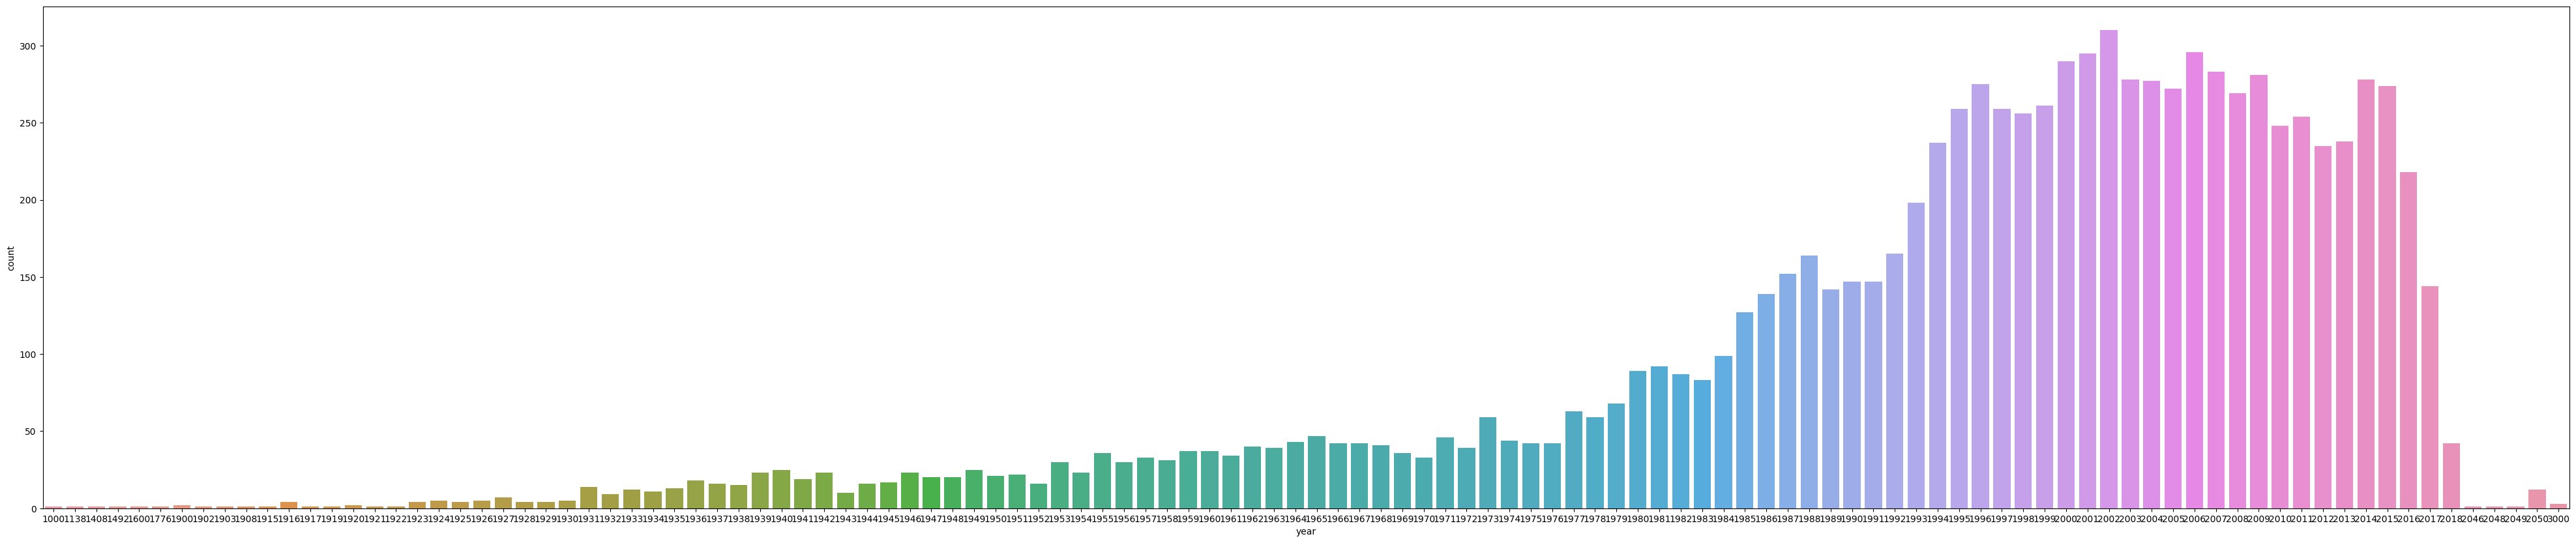

In [15]:
plt.figure(figsize=(50,10))
# sns.countplot(data=movies, x='year')
sns.countplot(data=movies, x='year', order=sorted(movies['year'].unique())) # 위 처럼 자동정렬이 안된 경우

### genre 분석

In [16]:
movies['genres']

movieId
1         Adventure|Animation|Children|Comedy|Fantasy
2                          Adventure|Children|Fantasy
3                                      Comedy|Romance
4                                Comedy|Drama|Romance
5                                              Comedy
                             ...                     
193581                Action|Animation|Comedy|Fantasy
193583                       Animation|Comedy|Fantasy
193585                                          Drama
193587                               Action|Animation
193609                                         Comedy
Name: genres, Length: 9742, dtype: object

In [17]:
sample_genre = movies['genres'][1]
sample_genre

'Adventure|Animation|Children|Comedy|Fantasy'

In [18]:
# split 해보기
sample_genre.split("|")

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [19]:
# split > lambda 함수 적용
movies['genres'].apply(lambda x: x.split("|"))

movieId
1         [Adventure, Animation, Children, Comedy, Fantasy]
2                            [Adventure, Children, Fantasy]
3                                         [Comedy, Romance]
4                                  [Comedy, Drama, Romance]
5                                                  [Comedy]
                                ...                        
193581                 [Action, Animation, Comedy, Fantasy]
193583                         [Animation, Comedy, Fantasy]
193585                                              [Drama]
193587                                  [Action, Animation]
193609                                             [Comedy]
Name: genres, Length: 9742, dtype: object

In [20]:
genres_list = list(movies['genres'].apply(lambda x: x.split("|")))
genres_list[:5]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

In [21]:
# 구글링: python flatten list of list
flat_list = []
for sublist in genres_list:
    for item in sublist:
        flat_list.append(item)

In [22]:
# 중복제거
genres_unique = set(flat_list)
genres_unique

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [23]:
len(genres_unique) # 장르는 19개 (no genres listed 제외)

20

### 장르 데이터 숫자형으로 변환하기

In [26]:
message = 'Hello'
message

'Hello'

In [28]:
'H' in message

True

In [39]:
'IMAX' in sample_genre

False

In [40]:
# 방법1 (복잡)
movies['Action'] = movies['genres'].apply(lambda x: 'AActiondventure' in x)
movies['IMAX'] = movies['genres'].apply(lambda x: 'IMAX' in x)

movies

,title,genres,year,Adventure,IMAX,Action
movieId,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True,False,False
2,Jumanji (1995),Adventure|Children|Fantasy,1995,True,False,False
3,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,False,False
5,Father of the Bride Part II (1995),Comedy,1995,False,False,False
...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,False,False,False
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,False,False,False
193585,Flint (2017),Drama,2017,False,False,False


In [53]:
# 방법2 (간단)
genres_dummies = movies['genres'].str.get_dummies(sep='|')
genres_dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# csv 파일 vs pickle 파일
# csv 는 comma로 데이터를 구분하고 pickledms index로 구분해서 판다스 사용시 더 유리하다.
# googling: "differenct between csv and pickle when saving pandas dataframe"
# https://stackoverflow.com/questions/48770542/what-is-the-difference-between-save-a-pandas-dataframe-to-pickle-and-to-csv

genres_dummies.to_pickle('/content/drive/MyDrive/Colab Notebooks/data/ml-latest-small/genres.p')

In [58]:
# 장르간 상관관계
# 상관계수: -1~1 음or양의 상관관계
genres_dummies.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


<Axes: >

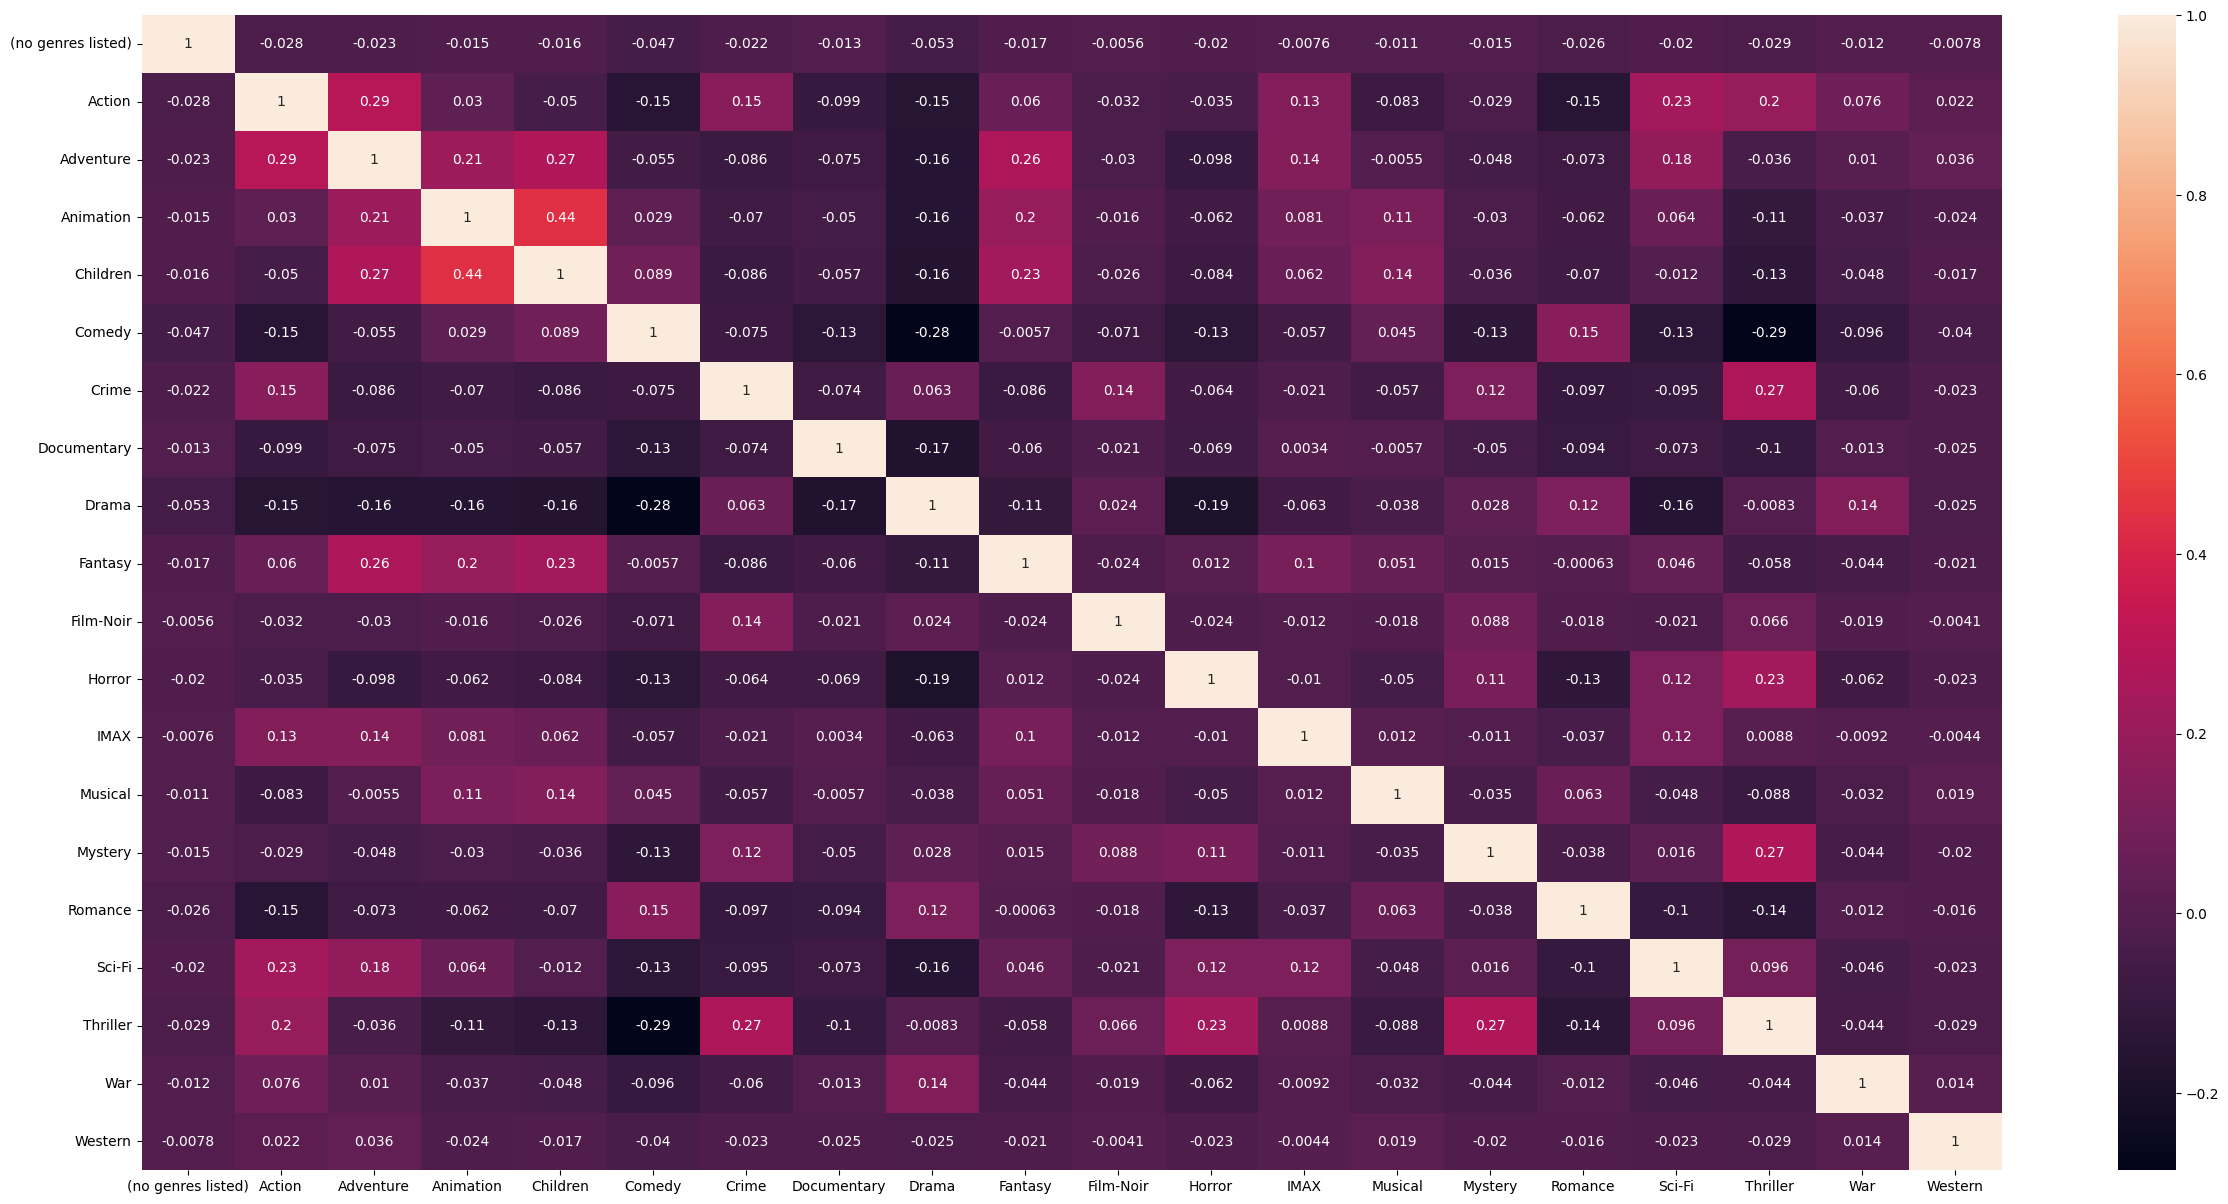

In [62]:
plt.figure(figsize=(30,15))
sns.heatmap(genres_dummies.corr(), annot=True)  # annot: 각 셀에 숫자로 된 값을 표시